# Automotive Industry Data Analysis

The automotive industry is nevertheless faced with a myriad of issues. It's an exciting time for individuals with the appropriate ambition, with opportunities to differentiate and stand out from the crowd. Analytics is one area that has the potential to provide major competitive advantage. 
The main scope of this project is to analyse data from the automotive industry and extract all relevant insights in order to comprehend the automobile market based on a set of criteria. 

Several factors while considering a automobile is Engine Performance,Body Type ,Safety ,Fuel & New Technology.
This type of information will have an impact on the market, and automobile manufacturers will be able to use it to increase their profits while also assisting us in improving the features that the future world need.

## Performing EDA

In [36]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 40)
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore');

In [37]:
df = pd.read_csv('/Users/divyabisht/Desktop/cars_engage_2022.csv')

In [38]:
df.head()

Unnamed: 0  Make      Model  Variant Ex-Showroom_Price Displacement  \
0           0  Tata  Nano Genx       Xt      Rs. 2,92,667       624 cc   
1           1  Tata  Nano Genx       Xe      Rs. 2,36,447       624 cc   
2           2  Tata  Nano Genx  Emax Xm      Rs. 2,96,661       624 cc   
3           3  Tata  Nano Genx      Xta      Rs. 3,34,768       624 cc   
4           4  Tata  Nano Genx       Xm      Rs. 2,72,223       624 cc   

   Cylinders  Valves_Per_Cylinder              Drivetrain  \
0        2.0                  2.0  RWD (Rear Wheel Drive)   
1        2.0                  2.0  RWD (Rear Wheel Drive)   
2        2.0                  2.0  RWD (Rear Wheel Drive)   
3        2.0                  2.0  RWD (Rear Wheel Drive)   
4        2.0                  2.0  RWD (Rear Wheel Drive)   

  Cylinder_Configuration Emission_Norm   Engine_Location Fuel_System  \
0                In-line         BS IV  Rear, Transverse   Injection   
1                In-line         BS IV  Rear, Transverse   Injection   
2                In-line         BS IV  Rear, Transverse   Injection   
3                In-line         BS IV  Rear, Transverse   Injection   
4                In-line         BS IV  Rear, Transverse   Injection   

  Fuel_Tank_Capacity Fuel_Type   Height   Length    Width  Body_Type  Doors  \
0          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   
1          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   
2          15 litres       CNG  1652 mm  3164 mm  1750 mm  Hatchback    4.0   
3          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   
4          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   

   ... Rear_Center_Armrest iPod_Compatibility  \
0  ...                 NaN                NaN   
1  ...                 NaN                NaN   
2  ...                 NaN                NaN   
3  ...                 NaN                NaN   
4  ...                 NaN                NaN   

  ESP_(Electronic_Stability_Program) Cooled_Glove_Box  \
0                                NaN              NaN   
1                                NaN              NaN   
2                                NaN              NaN   
3                                NaN              NaN   
4                                NaN              NaN   

  Recommended_Tyre_Pressure Heated_Seats Turbocharger  \
0                       NaN          NaN          NaN   
1                       NaN          NaN          NaN   
2                       NaN          NaN          NaN   
3                       NaN          NaN          NaN   
4                       NaN          NaN          NaN   

  ISOFIX_(Child-Seat_Mount) Rain_Sensing_Wipers Paddle_Shifters  \
0                       NaN                 NaN             NaN   
1                       NaN                 NaN             NaN   
2                       NaN                 NaN             NaN   
3                       NaN                 NaN             NaN   
4                       NaN                 NaN             NaN   

  Leather_Wrapped_Steering Automatic_Headlamps Engine_Type  \
0                      NaN                 NaN         NaN   
1                      NaN                 NaN         NaN   
2                      NaN                 NaN         NaN   
3                      NaN                 NaN         NaN   
4                      NaN                 NaN         NaN   

  ASR_/_Traction_Control Cruise_Control USB_Ports Heads-Up_Display  \
0                    NaN            NaN       NaN              NaN   
1                    NaN            NaN       NaN              NaN   
2                    NaN            NaN       NaN              NaN   
3                    NaN            NaN       NaN              NaN   
4                    NaN            NaN       NaN              NaN   

  Welcome_Lights Battery Electric_Range  
0            NaN     NaN            NaN  
1            NaN     

In [39]:
df.shape

(1276, 141)

In [40]:
df.describe()

Unnamed: 0    Cylinders  Valves_Per_Cylinder        Doors  \
count  1276.000000  1210.000000          1174.000000  1272.000000   
mean    637.500000     4.380992             3.977853     4.550314   
std     368.493781     1.660957             0.833763     0.747816   
min       0.000000     2.000000             1.000000     2.000000   
25%     318.750000     4.000000             4.000000     4.000000   
50%     637.500000     4.000000             4.000000     5.000000   
75%     956.250000     4.000000             4.000000     5.000000   
max    1275.000000    16.000000            16.000000     5.000000   

       Seating_Capacity  Number_of_Airbags  USB_Ports  
count       1270.000000        1141.000000  29.000000  
mean           5.270079           3.787029   1.793103  
std            1.145231           2.522399   0.773642  
min            2.000000           1.000000   1.000000  
25%            5.000000           2.000000   1.000000  
50%            5.000000           2.000000   2.000000  
75%            5.000000           6.000000   2.000000  
max           16.000000          14.000000   3.000000

In [41]:
df.columns


Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=141)

In [42]:
df.nunique()

Unnamed: 0           1276
Make                   39
Model                 263
Variant              1064
Ex-Showroom_Price    1179
                     ... 
USB_Ports               3
Heads-Up_Display        1
Welcome_Lights          1
Battery                 5
Electric_Range          8
Length: 141, dtype: int64

In [43]:
df['Ex-Showroom_Price'].unique()

array(['Rs. 2,92,667', 'Rs. 2,36,447', 'Rs. 2,96,661', ...,
       'Rs. 14,31,000', 'Rs. 12,01,000', 'Rs. 68,62,560'], dtype=object)

In [44]:
#cleaning the data

In [45]:
df.isnull().sum()

Unnamed: 0              0
Make                   75
Model                   0
Variant                 0
Ex-Showroom_Price       0
                     ... 
USB_Ports            1247
Heads-Up_Display     1225
Welcome_Lights       1207
Battery              1263
Electric_Range       1259
Length: 141, dtype: int64

In [52]:
pd.DataFrame(df.info(141))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 141 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    Unnamed: 0                                 int64  
 1    Make                                       object 
 2    Model                                      object 
 3    Variant                                    object 
 4    Ex-Showroom_Price                          object 
 5    Displacement                               object 
 6    Cylinders                                  float64
 7    Valves_Per_Cylinder                        float64
 8    Drivetrain                                 object 
 9    Cylinder_Configuration                     object 
 10   Emission_Norm                              object 
 11   Engine_Location                            object 
 12   Fuel_System                                object 
 13   Fuel_Tank_Capacity             

Empty DataFrame
Columns: []
Index: []

In [46]:
df


Unnamed: 0        Make      Model        Variant Ex-Showroom_Price  \
0              0        Tata  Nano Genx             Xt      Rs. 2,92,667   
1              1        Tata  Nano Genx             Xe      Rs. 2,36,447   
2              2        Tata  Nano Genx        Emax Xm      Rs. 2,96,661   
3              3        Tata  Nano Genx            Xta      Rs. 3,34,768   
4              4        Tata  Nano Genx             Xm      Rs. 2,72,223   
...          ...         ...        ...            ...               ...   
1271        1271       Honda       City   Vx Mt Diesel     Rs. 13,02,000   
1272        1272       Honda       City   Zx Mt Diesel     Rs. 14,21,000   
1273        1273       Honda       City  Zx Cvt Petrol     Rs. 14,31,000   
1274        1274       Honda       City   V Cvt Petrol     Rs. 12,01,000   
1275        1275  Mitsubishi    Montero         3.2 At     Rs. 68,62,560   

     Displacement  Cylinders  Valves_Per_Cylinder               Drivetrain  \
0          624 cc        2.0                  2.0   RWD (Rear Wheel Drive)   
1          624 cc        2.0                  2.0   RWD (Rear Wheel Drive)   
2          624 cc        2.0                  2.0   RWD (Rear Wheel Drive)   
3          624 cc        2.0                  2.0   RWD (Rear Wheel Drive)   
4          624 cc        2.0                  2.0   RWD (Rear Wheel Drive)   
...           ...        ...                  ...                      ...   
1271      1498 cc        4.0                  4.0  FWD (Front Wheel Drive)   
1272      1498 cc        4.0                  4.0  FWD (Front Wheel Drive)   
1273      1497 cc        4.0                  4.0  FWD (Front Wheel Drive)   
1274      1497 cc        4.0                  4.0  FWD (Front Wheel Drive)   
1275      3200 cc        4.0                  4.0    AWD (All Wheel Drive)   

     Cylinder_Configuration Emission_Norm      Engine_Location Fuel_System  \
0                   In-line         BS IV     Rear, Transverse   Injection   
1                   In-line         BS IV     Rear, Transverse   Injection   
2                   In-line         BS IV     Rear, Transverse   Injection   
3                   In-line         BS IV     Rear, Transverse   Injection   
4                   In-line         BS IV     Rear, Transverse   Injection   
...                     ...           ...                  ...         ...   
1271                In-line         BS IV    Front, Transverse   Injection   
1272                In-line         BS IV    Front, Transverse   Injection   
1273                In-line          BS 6    Front, Transverse   Injection   
1274                In-line          BS 6    Front, Transverse   Injection   
1275                In-line         BS IV  Front, Longitudinal   Injection   

     Fuel_Tank_Capacity Fuel_Type   Height   Length    Width  Body_Type  \
0             24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback   
1             24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback   
2             15 litres       CNG  1652 mm  3164 mm  1750 mm  Hatchback   
3             24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback   
4             24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback   
...                 ...       ...      ...      ...      ...        ...   
1271          40 litres    Diesel  1495 mm  4440 mm  1695 mm      Sedan   
1272          40 litres    Diesel  1495 mm  4440 mm  1695 mm      Sedan   
1273          40 litres    Petrol  1495 mm  4440 mm  1695 mm      Sedan   
1274          40 litres    Petrol  1495 mm  4440 mm  1695 mm      Sedan   
1275          88 litres    Diesel  1900 mm  4900 mm  1875 mm        SUV   

      Doors  ... Rear_Center_Armrest iPod_Compatibility  \
0       5.0  ...                 NaN                NaN   
1       5.0  ...                 NaN                NaN   
2       4.0  ...                 NaN                NaN   
3       5.0  ...                 NaN                NaN   
4       5.0  ...       

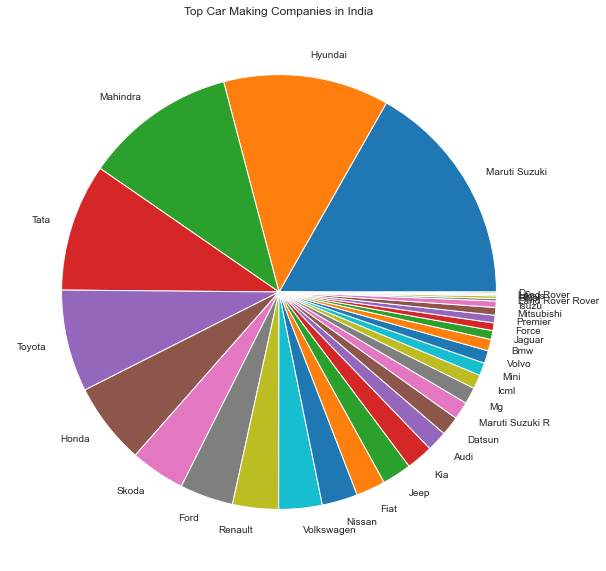

In [172]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Make.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Top Car Making Companies in India")
plt.show()

## releationship analysis

In [48]:
corelation = df.corr()

<AxesSubplot:>

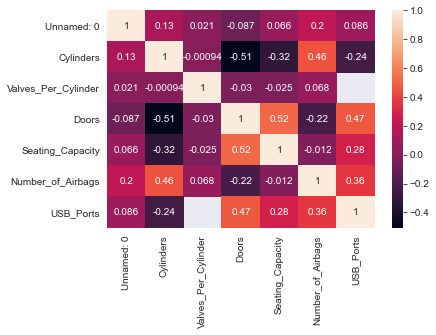

In [49]:
sns.heatmap(corelation, xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

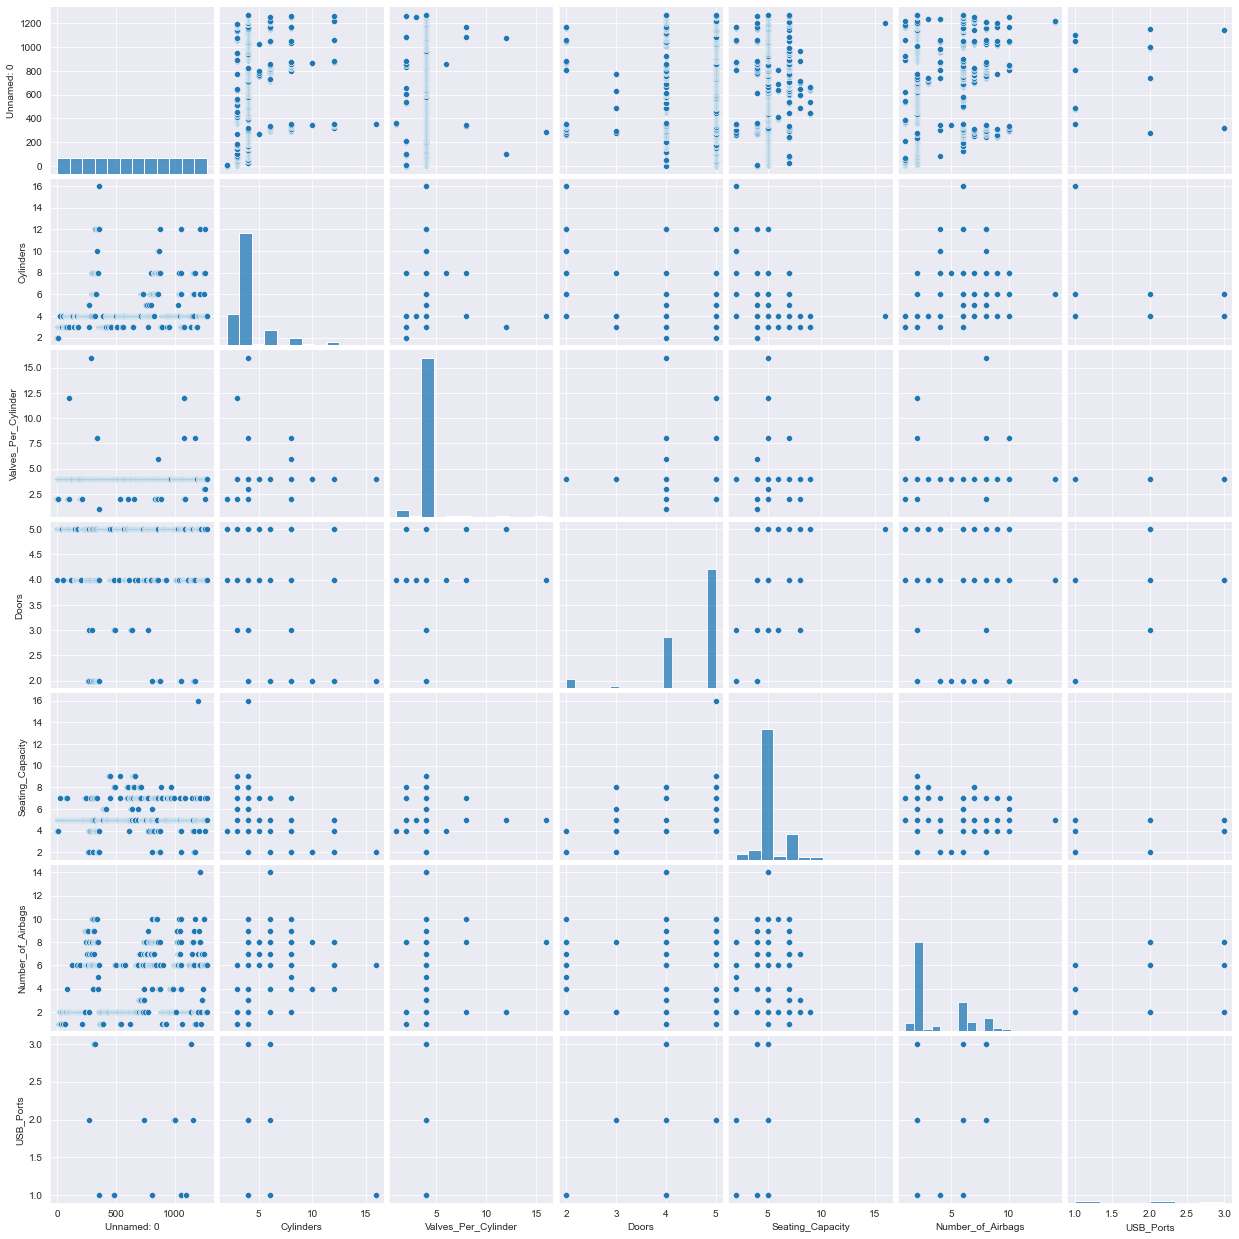

In [50]:
sns.pairplot(df)

In [51]:
a_b = len(df)
b_c = len(df.Make.unique())
c_d = len(df.Model.unique())
d_f = len(df.columns)
fig = px.bar(x=['Observations',"Makers",'Models','Features'],y=[a_b,b_c,c_d,d_f], width=800,height=400)
fig.update_layout(
    title="Dataset Statistics",
    xaxis_title="",
    yaxis_title="Counts",
    font=dict(
        size=16,
    )
)

fig.show()

In [53]:
## Replacing null values


In [54]:
df['Seat_Height_Adjustment'] = df['Seat_Height_Adjustment'].replace(to_replace=np.nan , value='Manual Adjustment')

In [55]:
df['EBA_(Electronic_Brake_Assist)'] = df['EBA_(Electronic_Brake_Assist)'].replace(to_replace=np.nan , value='No')

In [56]:
df.drop(['Wheelbase'], axis=1, inplace=True)

In [57]:
df.drop(['Heated_Seats', 'Recommended_Tyre_Pressure', 'Apple_CarPlay' ,'Android_Auto','Walk_Away_Auto_Car_Lock' ,'Voice_Recognition', 'Passenger_Side_Seat-Belt_Reminder' ,'Lane_Watch_Camera/_Side_Mirror_Camera', 'High_Speed_Alert_System' ,'Drive_Modes' ,'Ambient_Lightning' ,'3_Point_Seat-Belt_in_Middle_Rear_Seat'], axis=1, inplace=True)

In [58]:
## to replace the symbols with nothing to get the numeric values from the categorical values.

In [59]:
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs' , '')
df['Ex-Showroom_Price'] =df['Ex-Showroom_Price'].str.replace(',' , '')


In [60]:
df['Ex-Showroom_Price'] =df['Ex-Showroom_Price'].str.replace('.' , '')
df.head()

Unnamed: 0  Make      Model  Variant Ex-Showroom_Price Displacement  \
0           0  Tata  Nano Genx       Xt            292667       624 cc   
1           1  Tata  Nano Genx       Xe            236447       624 cc   
2           2  Tata  Nano Genx  Emax Xm            296661       624 cc   
3           3  Tata  Nano Genx      Xta            334768       624 cc   
4           4  Tata  Nano Genx       Xm            272223       624 cc   

   Cylinders  Valves_Per_Cylinder              Drivetrain  \
0        2.0                  2.0  RWD (Rear Wheel Drive)   
1        2.0                  2.0  RWD (Rear Wheel Drive)   
2        2.0                  2.0  RWD (Rear Wheel Drive)   
3        2.0                  2.0  RWD (Rear Wheel Drive)   
4        2.0                  2.0  RWD (Rear Wheel Drive)   

  Cylinder_Configuration Emission_Norm   Engine_Location Fuel_System  \
0                In-line         BS IV  Rear, Transverse   Injection   
1                In-line         BS IV  Rear, Transverse   Injection   
2                In-line         BS IV  Rear, Transverse   Injection   
3                In-line         BS IV  Rear, Transverse   Injection   
4                In-line         BS IV  Rear, Transverse   Injection   

  Fuel_Tank_Capacity Fuel_Type   Height   Length    Width  Body_Type  Doors  \
0          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   
1          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   
2          15 litres       CNG  1652 mm  3164 mm  1750 mm  Hatchback    4.0   
3          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   
4          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   

   ... Second_Row_AC_Vents Tyre_Pressure_Monitoring_System  \
0  ...                 NaN                             NaN   
1  ...                 NaN                             NaN   
2  ...                 NaN                             NaN   
3  ...                 NaN                             NaN   
4  ...                 NaN                             NaN   

  Rear_Center_Armrest iPod_Compatibility ESP_(Electronic_Stability_Program)  \
0                 NaN                NaN                                NaN   
1                 NaN                NaN                                NaN   
2                 NaN                NaN                                NaN   
3                 NaN                NaN                                NaN   
4                 NaN                NaN                                NaN   

  Cooled_Glove_Box Turbocharger ISOFIX_(Child-Seat_Mount) Rain_Sensing_Wipers  \
0              NaN          NaN                       NaN                 NaN   
1              NaN          NaN                       NaN                 NaN   
2              NaN          NaN                       NaN                 NaN   
3              NaN          NaN                       NaN                 NaN   
4              NaN          NaN                       NaN                 NaN   

  Paddle_Shifters Leather_Wrapped_Steering Automatic_Headlamps Engine_Type  \
0             NaN                      NaN                 NaN         NaN   
1             NaN                      NaN                 NaN         NaN   
2             NaN                      NaN                 NaN         NaN   
3             NaN                      NaN                 NaN         NaN   
4             NaN                      NaN                 NaN         NaN   

  ASR_/_Traction_Control Cruise_Control USB_Ports Heads-Up_Display  \
0                    NaN            NaN       NaN              NaN   
1                    NaN            NaN       NaN              NaN   
2                    NaN            NaN       NaN              NaN   
3                    NaN            NaN       NaN              NaN   
4                    NaN            NaN       NaN              NaN   

  Welcome_Lights Battery Electric_Range  
0            NaN

In [61]:
df['Number_of_Airbags'] = df['Number_of_Airbags'].fillna(df['Number_of_Airbags'].mean()) 

In [62]:
df.drop(['Compression_Ratio'], axis=1, inplace=True)

In [63]:
df.drop(['Welcome_Lights'], axis=1, inplace=True)

In [64]:
df['Sun_Visor'] = df['Sun_Visor'].fillna(df['Sun_Visor'].mode()[0])

In [65]:
df['Torque'] = df['Torque'].fillna(df['Torque'].mode()[0])

In [66]:
df['Power_Windows'] = df['Power_Windows'].fillna(df['Power_Windows'].mode()[0])

In [67]:
df['Bluetooth'] = df['Bluetooth'].fillna(df['Seats_Material'].mode()[0])

In [68]:
df['Rear_Tyre_&_Rim'] = df['Rear_Tyre_&_Rim'].fillna(df['Rear_Tyre_&_Rim'].mode()[0])

In [69]:
df['Front_Tyre_&_Rim'] = df['Front_Tyre_&_Rim'].fillna(df['Front_Tyre_&_Rim'].mode()[0])

In [70]:
df['Rear_Track'] = df['Rear_Track'].fillna(df['Rear_Track'].mode()[0])

In [71]:
df['Front_Track'] = df['Front_Track'].fillna(df['Front_Track'].mode()[0])

In [72]:
df['Ventilation_System'] = df['Ventilation_System'].fillna(method = 'bfill')

In [73]:
df['Front_Suspension'] = df['Front_Suspension'].fillna(method = 'bfill')


In [74]:
df['Rear_Brakes'] = df['Rear_Brakes'].fillna(df['Rear_Brakes'].mode()[0])

In [75]:


df['Front_Brakes'] = df['Front_Brakes'].fillna(df['Front_Brakes'].mode()[0])

In [77]:
df['Ground_Clearance'] = df['Ground_Clearance'].fillna(method = 'bfill')

In [78]:
df['Kerb_Weight'] = df['Kerb_Weight'].fillna(df['Kerb_Weight'].mode()[0])

In [79]:
df.drop(['Highway_Mileage'], axis=1, inplace=True)

In [80]:
df.drop(['City_Mileage'], axis=1, inplace=True)

In [81]:
df['Doors'] = df['Doors'].fillna(df['Doors'].mean()) 

In [82]:
df['Body_Type'] = df['Body_Type'].fillna(df['Body_Type'].mode()[0])

In [83]:
df['Width'] = df['Width'].fillna(method = 'bfill')

In [84]:
df['Length'] = df['Length'].str.replace('mm' , '')

In [85]:
df['Width'] = df['Width'].str.replace('mm' , '')

In [86]:
df['Height'] = df['Height'].fillna(method = 'bfill')

In [87]:
df['Height'] = df['Height'].str.replace('mm' , '')

In [88]:
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].fillna(df['Fuel_Tank_Capacity'].mode()[0])

In [89]:
df['Fuel_System'] = df['Fuel_System'].fillna(df['Fuel_System'].mode()[0])

In [90]:
df['Engine_Location'] = df['Engine_Location'].fillna(df['Engine_Location'].mode()[0])

In [91]:
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].fillna(df['Valves_Per_Cylinder'].mean()) 

In [92]:
df['Make'] = df['Make'].fillna(df['Make'].mode()[0])

In [93]:
df['Displacement'] = df['Displacement'].str.replace('cc' , '')

In [94]:
df['Displacement'] = df['Displacement'].fillna(method = 'pad')

In [95]:
df['Cylinders'] = df['Cylinders'].fillna(df['Cylinders'].mean()) 

In [96]:
df['Valves_Per_Cylinder'] = df['Valves_Per_Cylinder'].fillna(df['Valves_Per_Cylinder'].mean()) 

In [97]:
df['Drivetrain'] = df['Drivetrain'].fillna(df['Drivetrain'].mode()[0])

In [98]:
df['Cylinder_Configuration'] = df['Cylinder_Configuration'].fillna(df['Cylinder_Configuration'].mode()[0])

In [99]:
df['Emission_Norm'] = df['Emission_Norm'].fillna(df['Emission_Norm'].mode()[0])

In [100]:
df['Boot_Space'] = df['Boot_Space'].str.replace('litres' , '')
df['Ex-Showroom_Price'].head(19)

0      292667
1      236447
2      296661
3      334768
4      272223
5      314815
6      279650
7      351832
8      333419
9      362000
10     390000
11     437065
12     353290
13     283290
14     383290
15     413290
16     433290
17     454490
18     463290
Name: Ex-Showroom_Price, dtype: object

In [101]:
df[['Displacement' ,'Ex-Showroom_Price' ]] = df[['Displacement' ,'Ex-Showroom_Price' ]].astype(int)

In [102]:
df[['Height' ,'Length', 'Width' ]] = df[['Height' ,'Length', 'Width' ]].astype(float)

In [107]:
df[['Horsepower','Rpm']] = df.Power.str.split('@' , expand=True)

In [108]:
df['Horsepower'] = df['Horsepower'].str.replace('PS' , '')

In [109]:
## EDA


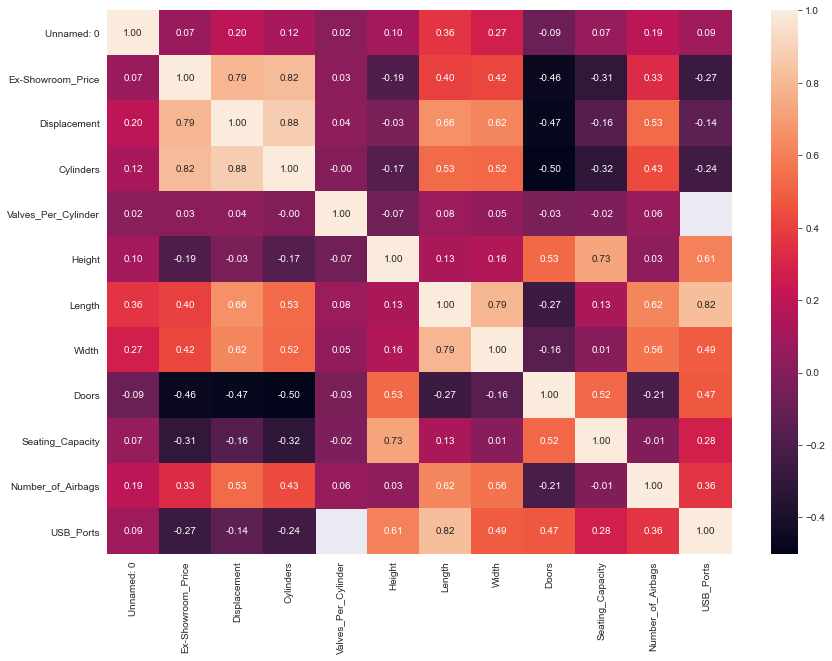

In [110]:
df[['Cylinders', 'Valves_Per_Cylinder', 'Doors', 'Seating_Capacity', 'Number_of_Airbags', 'Ex-Showroom_Price', 'Displacement']] = df[['Cylinders', 'Valves_Per_Cylinder', 'Doors', 'Seating_Capacity', 'Number_of_Airbags', 'Ex-Showroom_Price', 'Displacement']].apply(pd.to_numeric)
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)
plt.show()

In [111]:
## Brands with the most number of cars in the Indian market

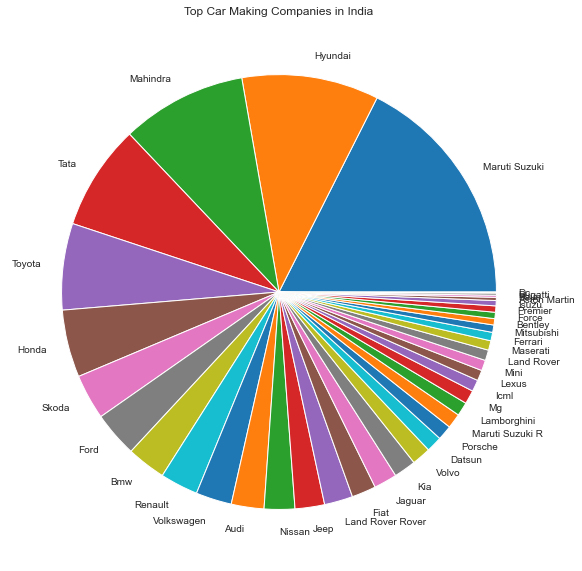

In [112]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Make.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Top Car Making Companies in India")
plt.show()

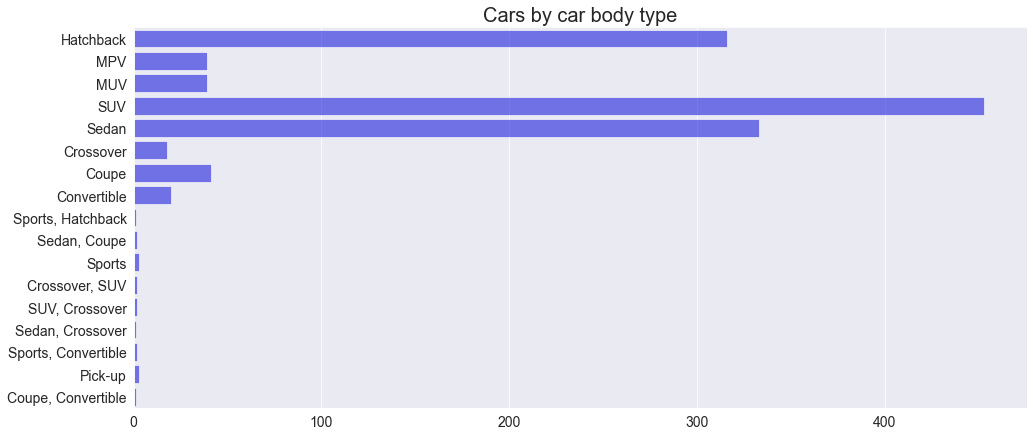

In [113]:
plt.figure(figsize=(16,7))
sns.countplot(data=df, y='Body_Type',alpha=.6,color='blue')
plt.title('Cars by car body type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

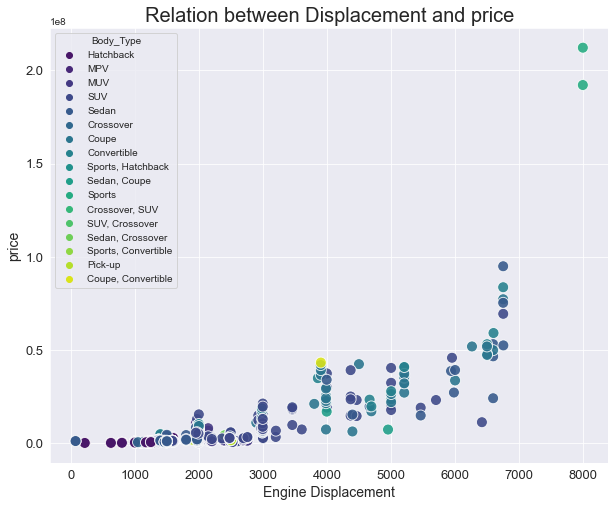

In [115]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Displacement', y='Ex-Showroom_Price',hue='Body_Type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('Engine Displacement',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.title('Relation between Displacement and price',fontsize=20);

In [118]:
## Cars count by Engine Fuel Type

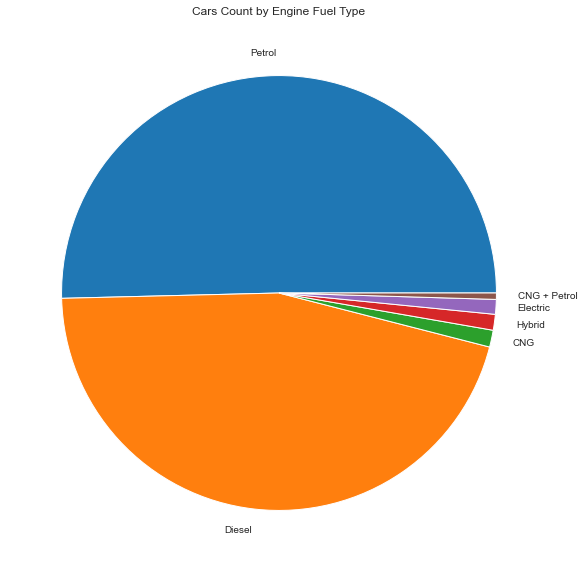

In [119]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Fuel_Type.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Cars Count by Engine Fuel Type")
plt.show()

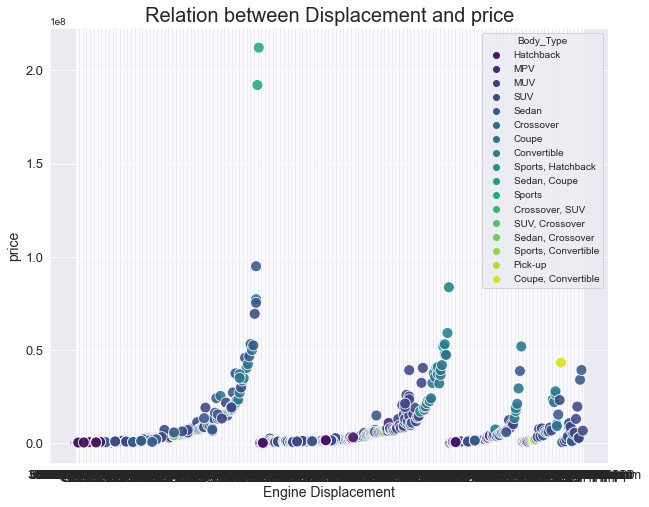

In [120]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Power', y='Ex-Showroom_Price',hue='Body_Type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('Engine Displacement',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.title('Relation between Displacement and price',fontsize=20);

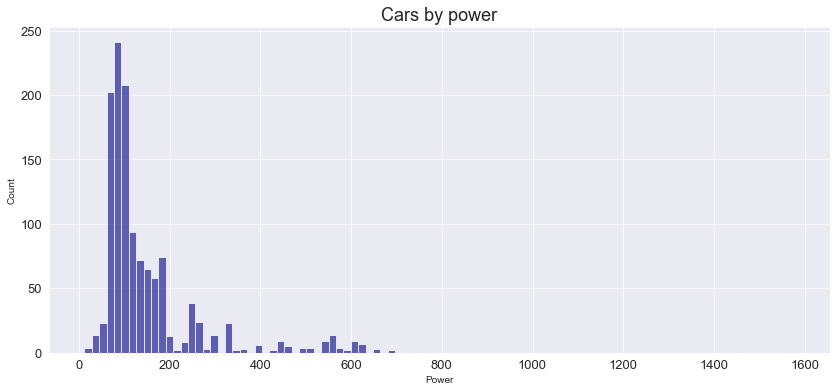

In [128]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='Power',alpha=.6, color='darkblue')
plt.title('Cars by power',fontsize=18);
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

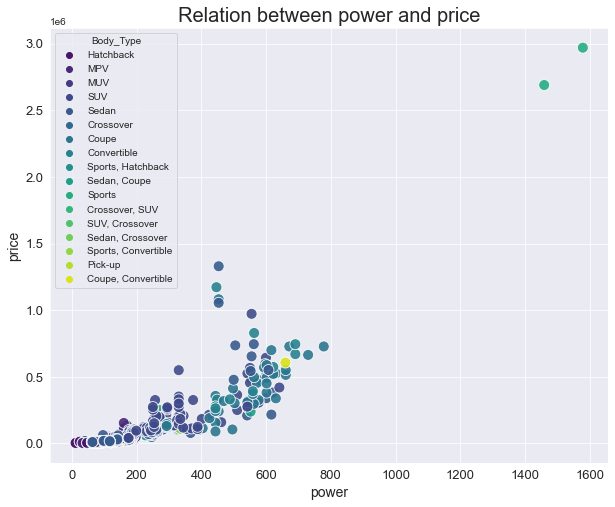

In [130]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Power', y='price',hue='Body_Type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('power',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.title('Relation between power and price',fontsize=20);

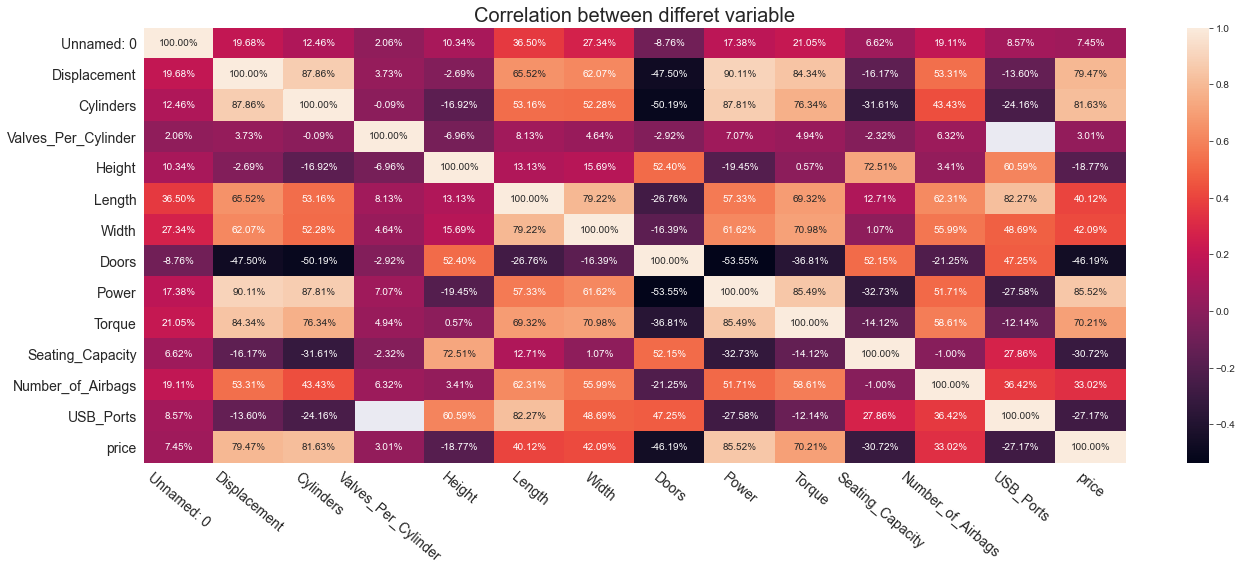

In [131]:
plt.figure(figsize=(22,8))
sns.heatmap(df.corr(), annot=True, fmt='.2%')
plt.title('Correlation between differet variable',fontsize=20)
plt.xticks(fontsize=14, rotation=320)
plt.yticks(fontsize=14);

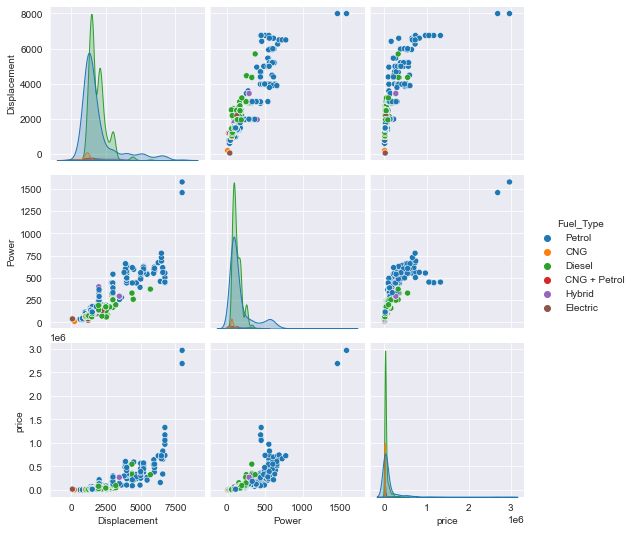

In [132]:
sns.pairplot(df,vars=[ 'Displacement','Power', 'price'], hue= 'Fuel_Type')

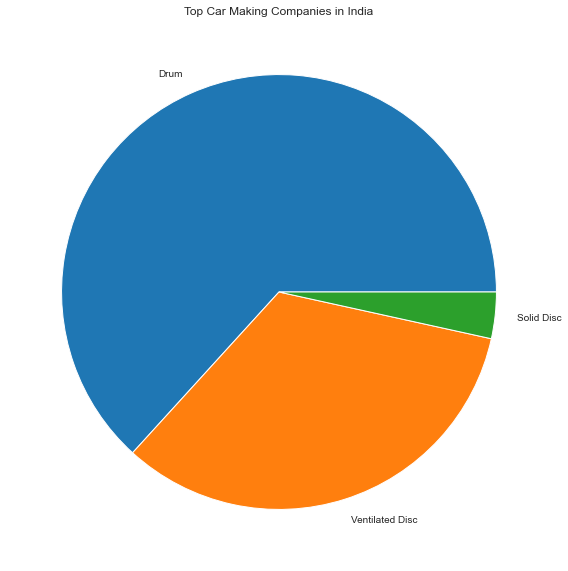

In [136]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Rear_Brakes.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Top Car Making Companies in India")
plt.show()

The one which do not have alloy wheels we will be getting drum brakes


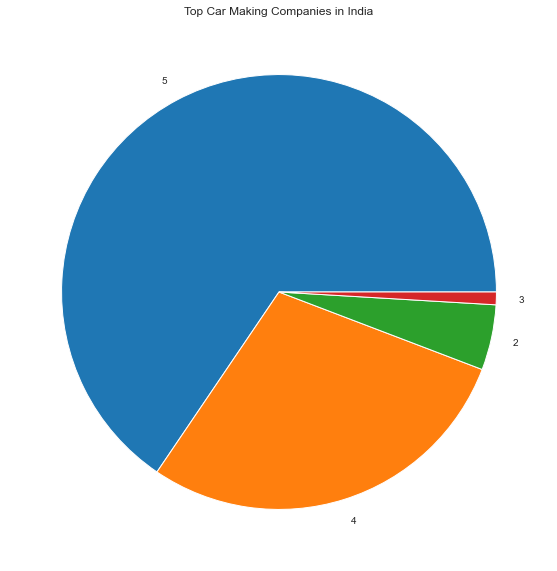

In [135]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Doors.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Top Car Making Companies in India")
plt.show()

Text(0.5, 1.0, 'Based on Warranty')

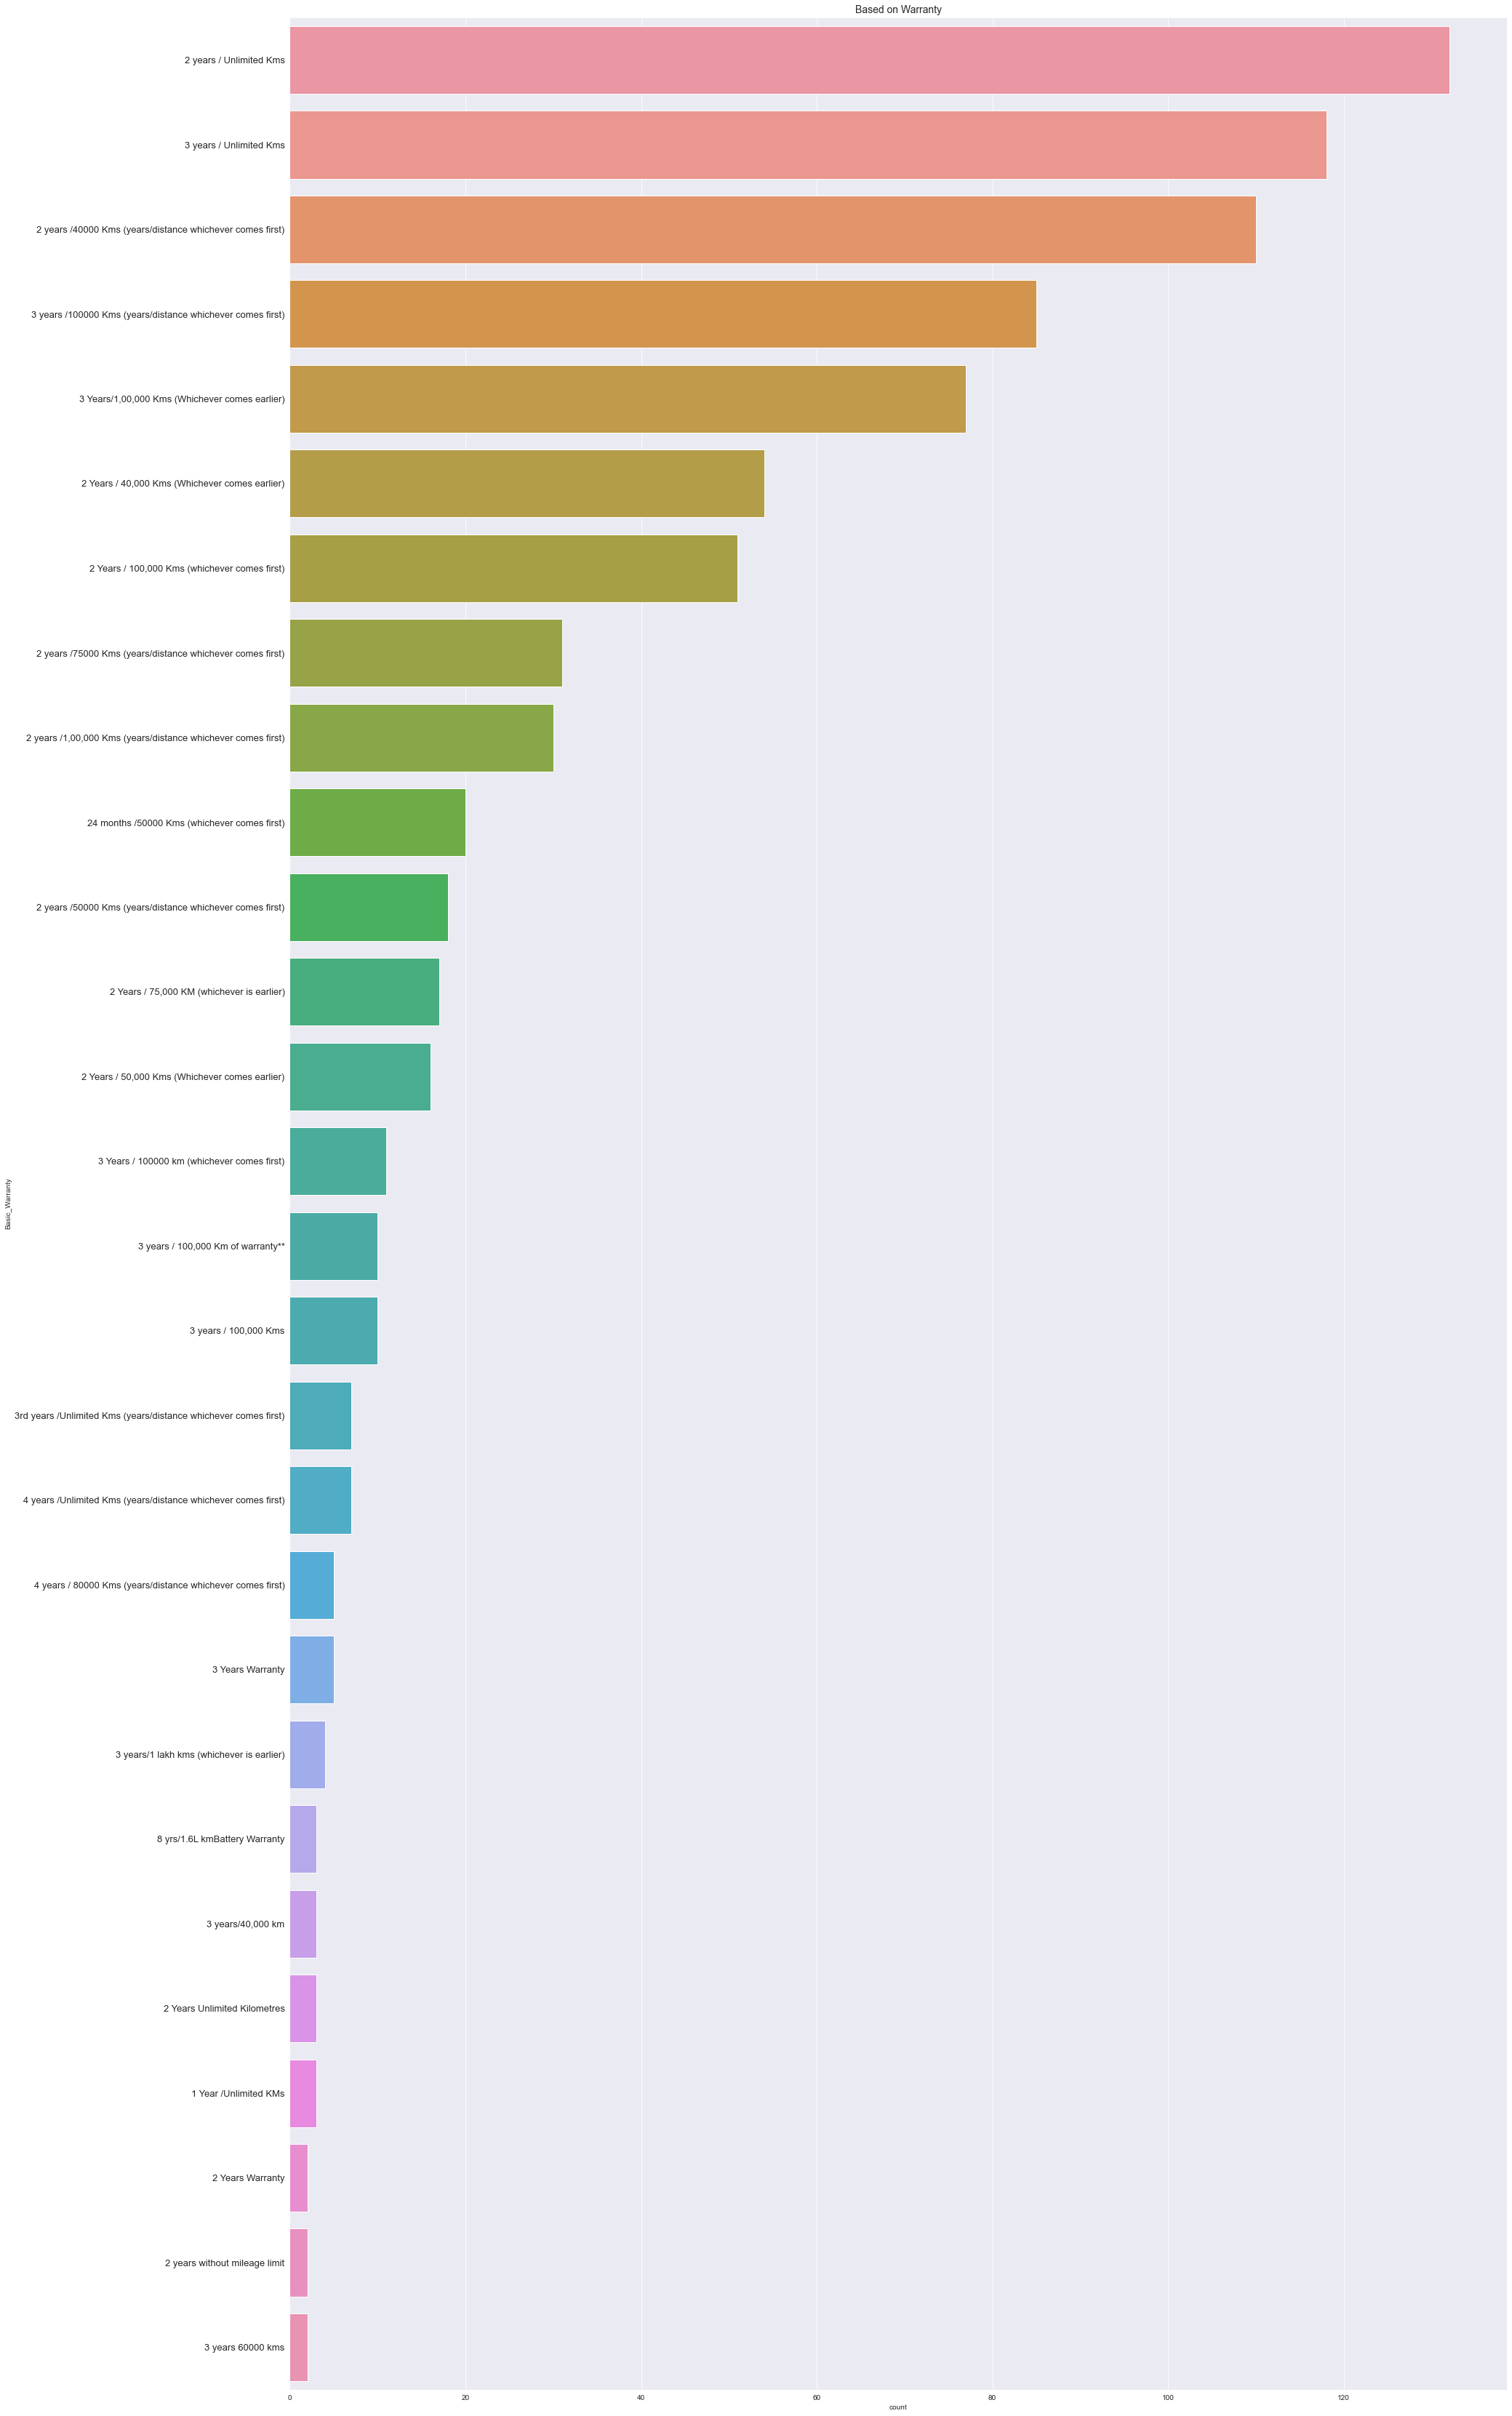

In [134]:
fig = plt.figure(figsize=(30,60))

ax21 = fig.add_subplot()

order = list(df.Make.value_counts().index)

o2 = list(df.Basic_Warranty.value_counts(ascending=False).index)
sns.countplot(data=df, y='Basic_Warranty', ax=ax21,order= o2)
ax21.yaxis.set_tick_params(rotation=0, labelsize=13)
ax21.set_title('Based on Warranty', fontsize=14)

## Cluster Analysis

In [137]:
# df = pd.read_csv("Final_df.csv")
pd.DataFrame(df.columns).head(60)

0
0                       Unnamed: 0
1                             Make
2                            Model
3                          Variant
4                     Displacement
5                        Cylinders
6              Valves_Per_Cylinder
7                       Drivetrain
8           Cylinder_Configuration
9                    Emission_Norm
10                 Engine_Location
11                     Fuel_System
12              Fuel_Tank_Capacity
13                       Fuel_Type
14                          Height
15                          Length
16                           Width
17                       Body_Type
18                           Doors
19          ARAI_Certified_Mileage
20  ARAI_Certified_Mileage_for_CNG
21                     Kerb_Weight
22                           Gears
23                Ground_Clearance
24                    Front_Brakes
25                     Rear_Brakes
26                Front_Suspension
27                 Rear_Suspension
28                     Front_Track
29                      Rear_Track
30                Front_Tyre_&_Rim
31                 Rear_Tyre_&_Rim
32                  Power_Steering
33                   Power_Windows
34                     Power_Seats
35                   Keyless_Entry
36                           Power
37                          Torque
38                        Odometer
39                     Speedometer
40                      Tachometer
41                       Tripmeter
42                Seating_Capacity
43                  Seats_Material
44                            Type
45                     Wheels_Size
46             Start_/_Stop_Button
47                12v_Power_Outlet
48                     Audiosystem
49            Aux-in_Compatibility
50        Average_Fuel_Consumption
51                  Basic_Warranty
52                       Bluetooth
53                 Boot-lid_Opener
54                      Boot_Space
55           CD_/_MP3_/_DVD_Player
56                 Central_Locking
57              Child_Safety_Locks
58                           Clock
59                     Cup_Holders

In [138]:
df.to_csv("final_df1.csv" , index=False)

In [139]:
df = pd.read_csv('final_df1.csv')
df.head(5)

Unnamed: 0  Make      Model  Variant  Displacement  Cylinders  \
0           0  Tata  Nano Genx       Xt           624        2.0   
1           1  Tata  Nano Genx       Xe           624        2.0   
2           2  Tata  Nano Genx  Emax Xm           624        2.0   
3           3  Tata  Nano Genx      Xta           624        2.0   
4           4  Tata  Nano Genx       Xm           624        2.0   

   Valves_Per_Cylinder              Drivetrain Cylinder_Configuration  \
0                  2.0  RWD (Rear Wheel Drive)                In-line   
1                  2.0  RWD (Rear Wheel Drive)                In-line   
2                  2.0  RWD (Rear Wheel Drive)                In-line   
3                  2.0  RWD (Rear Wheel Drive)                In-line   
4                  2.0  RWD (Rear Wheel Drive)                In-line   

  Emission_Norm   Engine_Location Fuel_System Fuel_Tank_Capacity Fuel_Type  \
0         BS IV  Rear, Transverse   Injection          24 litres    Petrol   
1         BS IV  Rear, Transverse   Injection          24 litres    Petrol   
2         BS IV  Rear, Transverse   Injection          15 litres       CNG   
3         BS IV  Rear, Transverse   Injection          24 litres    Petrol   
4         BS IV  Rear, Transverse   Injection          24 litres    Petrol   

   Height  Length   Width  Body_Type  Doors ARAI_Certified_Mileage  ...  \
0  1652.0  3164.0  1750.0  Hatchback      5          23.6 km/litre  ...   
1  1652.0  3164.0  1750.0  Hatchback      5          23.6 km/litre  ...   
2  1652.0  3164.0  1750.0  Hatchback      4     3.9778534923339013  ...   
3  1652.0  3164.0  1750.0  Hatchback      5          21.9 km/litre  ...   
4  1652.0  3164.0  1750.0  Hatchback      5          23.6 km/litre  ...   

  Rear_Center_Armrest iPod_Compatibility ESP_(Electronic_Stability_Program)  \
0                 NaN                NaN                                NaN   
1                 NaN                NaN                                NaN   
2                 NaN                NaN                                NaN   
3                 NaN                NaN                                NaN   
4                 NaN                NaN                                NaN   

  Cooled_Glove_Box Turbocharger ISOFIX_(Child-Seat_Mount) Rain_Sensing_Wipers  \
0              NaN          NaN                       NaN                 NaN   
1              NaN          NaN                       NaN                 NaN   
2              NaN          NaN                       NaN                 NaN   
3              NaN          NaN                       NaN                 NaN   
4              NaN          NaN                       NaN                 NaN   

  Paddle_Shifters Leather_Wrapped_Steering Automatic_Headlamps Engine_Type  \
0             NaN                      NaN                 NaN         NaN   
1             NaN                      NaN                 NaN         NaN   
2             NaN                      NaN                 NaN         NaN   
3             NaN                      NaN                 NaN         NaN   
4             NaN                      NaN                 NaN         NaN   

  ASR_/_Traction_Control Cruise_Control USB_Ports Heads-Up_Display Battery  \
0                    NaN            NaN       NaN              NaN     NaN   
1                    NaN            NaN       NaN              NaN     NaN   
2                    NaN            NaN       NaN              NaN     NaN   
3                    NaN            NaN       NaN              NaN     NaN   
4                    NaN            NaN       NaN              NaN     NaN   

   Electric_Range  Horsepower      Rpm price  
0             NaN          38  5500rpm  4097  
1             NaN          38  5500rpm  3310  
2             NaN          38  5500rpm  4153  
3             NaN          38  5500rpm  4686  
4             NaN          38  5500rpm  3811  

[5 rows x 126 columns]

In [140]:
df['Parking_Assistance'] = df['Parking_Assistance'].replace(to_replace='No' , value='No_Parking_Assistance')
df['Infotainment_Screen'] = df['Infotainment_Screen'].replace(to_replace='No' , value='No_Infotainment_Screen')
df['Infotainment_Screen'] = df['Infotainment_Screen'].replace(to_replace='Touch Sensitive' , value='Touch Sensitive_Parking_Assistance')

In [141]:
df['Auto-Dimming_Rear-View_Mirror'] = df['Auto-Dimming_Rear-View_Mirror'].replace(to_replace='Yes' , value=1)
df['Auto-Dimming_Rear-View_Mirror'] = df['Auto-Dimming_Rear-View_Mirror'].replace(to_replace='No' , value='0')



In [145]:
price_till_80 = df.price[(df.price >=3310) & (df.price <= 80000 )]
price_above_80 = df.price[(df.price >=80000) & (df.price <= 2970175 )]

<function matplotlib.pyplot.show(close=None, block=None)>

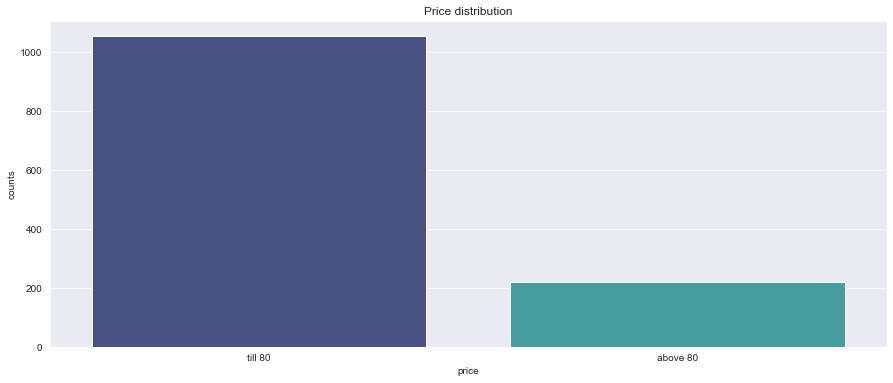

In [146]:
x=['till 80' , 'above 80']
y=[len(price_till_80) , len(price_above_80)]

plt.figure(figsize=(15,6))
sns.barplot(x=x,y=y,palette='mako')
plt.title('Price distribution')
plt.xlabel('price')
plt.ylabel('counts')
plt.show

In [147]:
df = df[df.price < 80000]

In [148]:
num_cols = [ i for i in df.columns if df[i].dtype != 'object']
X1 = df.loc[:,['Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Fuel_Tank_Capacity', 'Doors', 'ARAI_Certified_Mileage', 'Gears', 'Ground_Clearance', 'Power', 'Torque', 'Seating_Capacity', 'Start_/_Stop_Button', 'Bluetooth', 'Boot_Space', 'Central_Locking', 'Child_Safety_Locks', 'Distance_to_Empty', 'Engine_Malfunction_Light', 'FM_Radio', 'Low_Fuel_Warning', 'Multifunction_Display', 'Auto-Dimming_Rear-View_Mirror', 'Gear_Indicator', 'Engine_Immobilizer', 'Seat_Back_Pockets', 'ABS_(Anti-lock_Braking_System)', 'Door_Ajar_Warning', 'EBD_(Electronic_Brake-force_Distribution)', 'Fasten_Seat_Belt_Warning', 'Gear_Shift_Reminder', 'Number_of_Airbags', 'Key_Off_Reminder', 'Multifunction_Steering_Wheel', 'EBA_(Electronic_Brake_Assist)', 'Navigation_System', 'ESP_(Electronic_Stability_Program)', 'Turbocharger', 'ISOFIX_(Child-Seat_Mount)', 'Rain_Sensing_Wipers', 'Paddle_Shifters', 'Leather_Wrapped_Steering', 'price']].values
wcss=[]

In [158]:
num_cols = [ i for i in df.columns if df[i].dtype != 'object']
X1 = df.loc[:,['Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Fuel_Tank_Capacity', 'Doors', 'ARAI_Certified_Mileage', 'Gears', 'Ground_Clearance', 'Power', 'Torque', 'Seating_Capacity', 'Start_/_Stop_Button', 'Bluetooth', 'Boot_Space', 'Central_Locking', 'Child_Safety_Locks', 'Distance_to_Empty', 'Engine_Malfunction_Light', 'FM_Radio', 'Low_Fuel_Warning', 'Multifunction_Display', 'Auto-Dimming_Rear-View_Mirror', 'Gear_Indicator', 'Engine_Immobilizer', 'Seat_Back_Pockets', 'ABS_(Anti-lock_Braking_System)', 'Door_Ajar_Warning', 'EBD_(Electronic_Brake-force_Distribution)', 'Fasten_Seat_Belt_Warning', 'Gear_Shift_Reminder', 'Number_of_Airbags', 'Key_Off_Reminder', 'Multifunction_Steering_Wheel', 'EBA_(Electronic_Brake_Assist)', 'Navigation_System', 'ESP_(Electronic_Stability_Program)', 'Turbocharger', 'ISOFIX_(Child-Seat_Mount)', 'Rain_Sensing_Wipers', 'Paddle_Shifters', 'Leather_Wrapped_Steering', 'price']].values
wcss=[]


In [163]:
## Finding the potential strategic group  Cluster Analysis is mainly used for finding potential strategic group which is advantageous for a company of the field that is being analyzed.  Lets choose a brand for this analysis I am chooseing Tata nexon and going to find the cluster it is from

In [164]:
df.sample(10)
df[df.Model == 'Nexon']

Unnamed: 0  Make  Model                        Variant  Displacement  \
503         503  Tata  Nexon                             Xe          1198   
504         504  Tata  Nexon                             Xm          1198   
505         505  Tata  Nexon                             Xz          1198   
506         506  Tata  Nexon                        Xz Plus          1198   
507         507  Tata  Nexon              Xz Plus Dual Tone          1198   
508         508  Tata  Nexon                    Xz Plus (O)          1198   
509         509  Tata  Nexon          Xz Plus (O) Dual Tone          1198   
510         510  Tata  Nexon                            Xma          1198   
511         511  Tata  Nexon                       Xza Plus          1198   
512         512  Tata  Nexon             Xza Plus Dual Tone          1198   
513         513  Tata  Nexon                   Xza Plus (O)          1198   
514         514  Tata  Nexon         Xza Plus (O) Dual Tone          1198   
515         515  Tata  Nexon                      Xe Diesel          1497   
516         516  Tata  Nexon                      Xm Diesel          1497   
517         517  Tata  Nexon                      Xz Diesel          1497   
518         518  Tata  Nexon                 Xz Plus Diesel          1497   
519         519  Tata  Nexon       Xz Plus Diesel Dual Tone          1497   
520         520  Tata  Nexon             Xz Plus (O) Diesel          1497   
521         521  Tata  Nexon   Xz Plus (O) Diesel Dual Tone          1497   
522         522  Tata  Nexon                     Xma Diesel          1497   
523         523  Tata  Nexon                Xza Plus Diesel          1497   
524         524  Tata  Nexon      Xza Plus Diesel Dual Tone          1497   
525         525  Tata  Nexon            Xza Plus (O) Diesel          1497   
526         526  Tata  Nexon  Xza Plus (O) Diesel Dual Tone          1497   

     Cylinders  Valves_Per_Cylinder               Drivetrain  \
503        3.0                  4.0  FWD (Front Wheel Drive)   
504        3.0                  4.0  FWD (Front Wheel Drive)   
505        3.0                  4.0  FWD (Front Wheel Drive)   
506        3.0                  4.0  FWD (Front Wheel Drive)   
507        3.0                  4.0  FWD (Front Wheel Drive)   
508        3.0                  4.0  FWD (Front Wheel Drive)   
509        3.0                  4.0  FWD (Front Wheel Drive)   
510        3.0                  4.0  FWD (Front Wheel Drive)   
511        3.0                  4.0  FWD (Front Wheel Drive)   
512        3.0                  4.0  FWD (Front Wheel Drive)   
513        3.0                  4.0  FWD (Front Wheel Drive)   
514        3.0                  4.0  FWD (Front Wheel Drive)   
515        4.0                  4.0  FWD (Front Wheel Drive)   
516        4.0                  4.0  FWD (Front Wheel Drive)   
517        4.0                  4.0  FWD (Front Wheel Drive)   
518        4.0                  4.0  FWD (Front Wheel Drive)   
519        4.0                  4.0  FWD (Front Wheel Drive)   
520        4.0                  4.0  FWD (Front Wheel Drive)   
521        4.0                  4.0  FWD (Front Wheel Drive)   
522        4.0                  4.0  FWD (Front Wheel Drive)   
523        4.0                  4.0  FWD (Front Wheel Drive)   
524        4.0                  4.0  FWD (Front Wheel Drive)   
525        4.0                  4.0  FWD (Front Wheel Drive)   
526        4.0                  4.0  FWD (Front Wheel Drive)   

    Cylinder_Configuration Emission_Norm    Engine_Location Fuel_System  \
503                In-line          BS 6  Front, Transverse   Injection   
504                In-line          BS 6  Front, Transverse   Injection   
505                In-line          BS 6  Front, Transverse   Injection   
506                In-line          BS 6  Front, Transverse   Injection   
507                In-line          BS 6  Front, Transverse   Injection   
508                In-line  

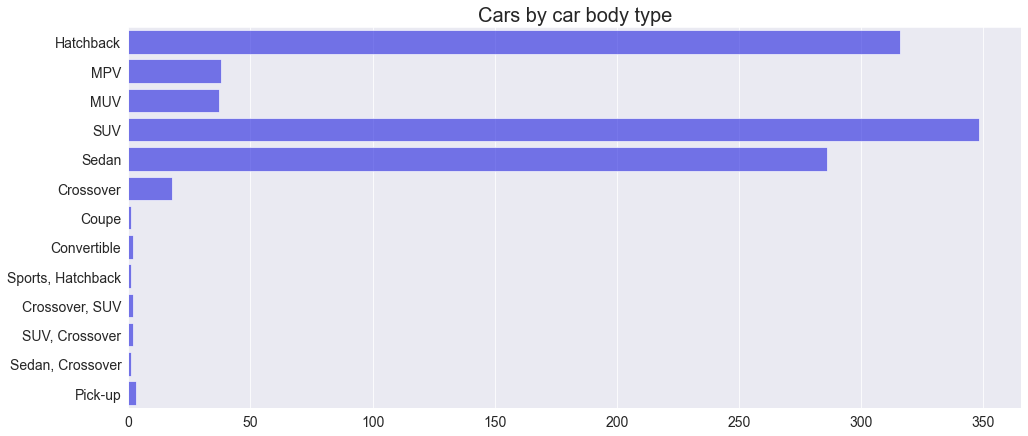

In [167]:
plt.figure(figsize=(16,7))
sns.countplot(data=df, y='Body_Type',alpha=.6,color='blue')
plt.title('Cars by car body type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

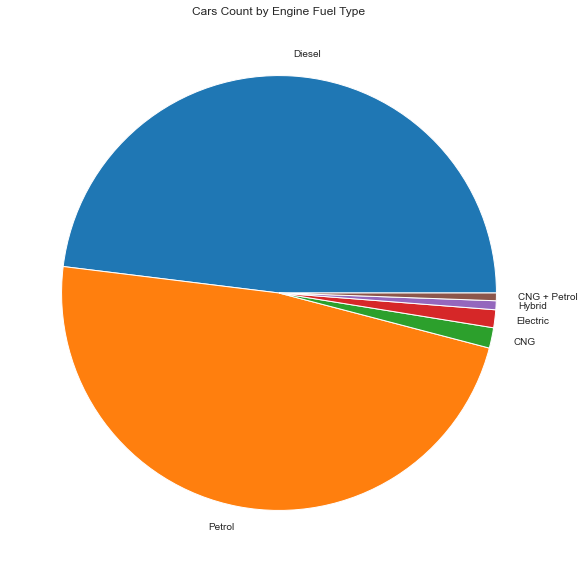

In [169]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Fuel_Type.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Cars Count by Engine Fuel Type")
plt.show()

Torque of diesel> petrol 
Torque is high pick up at initial and mid speed state will be better



In [175]:
df.to_csv("final_df1.csv" , index=False)

In [176]:
df = pd.read_csv('final_df1.csv')
df.head(5)

Unnamed: 0  Make      Model  Variant  Displacement  Cylinders  \
0           0  Tata  Nano Genx       Xt           624        2.0   
1           1  Tata  Nano Genx       Xe           624        2.0   
2           2  Tata  Nano Genx  Emax Xm           624        2.0   
3           3  Tata  Nano Genx      Xta           624        2.0   
4           4  Tata  Nano Genx       Xm           624        2.0   

   Valves_Per_Cylinder              Drivetrain Cylinder_Configuration  \
0                  2.0  RWD (Rear Wheel Drive)                In-line   
1                  2.0  RWD (Rear Wheel Drive)                In-line   
2                  2.0  RWD (Rear Wheel Drive)                In-line   
3                  2.0  RWD (Rear Wheel Drive)                In-line   
4                  2.0  RWD (Rear Wheel Drive)                In-line   

  Emission_Norm   Engine_Location Fuel_System Fuel_Tank_Capacity Fuel_Type  \
0         BS IV  Rear, Transverse   Injection          24 litres    Petrol   
1         BS IV  Rear, Transverse   Injection          24 litres    Petrol   
2         BS IV  Rear, Transverse   Injection          15 litres       CNG   
3         BS IV  Rear, Transverse   Injection          24 litres    Petrol   
4         BS IV  Rear, Transverse   Injection          24 litres    Petrol   

   Height  Length   Width  Body_Type  Doors ARAI_Certified_Mileage  ...  \
0  1652.0  3164.0  1750.0  Hatchback      5          23.6 km/litre  ...   
1  1652.0  3164.0  1750.0  Hatchback      5          23.6 km/litre  ...   
2  1652.0  3164.0  1750.0  Hatchback      4     3.9778534923339013  ...   
3  1652.0  3164.0  1750.0  Hatchback      5          21.9 km/litre  ...   
4  1652.0  3164.0  1750.0  Hatchback      5          23.6 km/litre  ...   

  Rear_Center_Armrest iPod_Compatibility ESP_(Electronic_Stability_Program)  \
0                 NaN                NaN                                NaN   
1                 NaN                NaN                                NaN   
2                 NaN                NaN                                NaN   
3                 NaN                NaN                                NaN   
4                 NaN                NaN                                NaN   

  Cooled_Glove_Box Turbocharger ISOFIX_(Child-Seat_Mount) Rain_Sensing_Wipers  \
0              NaN          NaN                       NaN                 NaN   
1              NaN          NaN                       NaN                 NaN   
2              NaN          NaN                       NaN                 NaN   
3              NaN          NaN                       NaN                 NaN   
4              NaN          NaN                       NaN                 NaN   

  Paddle_Shifters Leather_Wrapped_Steering Automatic_Headlamps Engine_Type  \
0             NaN                      NaN                 NaN         NaN   
1             NaN                      NaN                 NaN         NaN   
2             NaN                      NaN                 NaN         NaN   
3             NaN                      NaN                 NaN         NaN   
4             NaN                      NaN                 NaN         NaN   

  ASR_/_Traction_Control Cruise_Control USB_Ports Heads-Up_Display Battery  \
0                    NaN            NaN       NaN              NaN     NaN   
1                    NaN            NaN       NaN              NaN     NaN   
2                    NaN            NaN       NaN              NaN     NaN   
3                    NaN            NaN       NaN              NaN     NaN   
4                    NaN            NaN       NaN              NaN     NaN   

   Electric_Range  Horsepower      Rpm price  
0             NaN          38  5500rpm  4097  
1             NaN          38  5500rpm  3310  
2             NaN          38  5500rpm  4153  
3             NaN          38  5500rpm  4686  
4             NaN          38  5500rpm  3811  

[5 rows x 126 columns]

In [177]:
df['Parking_Assistance'] = df['Parking_Assistance'].replace(to_replace='No' , value='No_Parking_Assistance')
df['Infotainment_Screen'] = df['Infotainment_Screen'].replace(to_replace='No' , value='No_Infotainment_Screen')
df['Infotainment_Screen'] = df['Infotainment_Screen'].replace(to_replace='Touch Sensitive' , value='Touch Sensitive_Parking_Assistance')

In [178]:
df['Auto-Dimming_Rear-View_Mirror'] = df['Auto-Dimming_Rear-View_Mirror'].replace(to_replace='Yes' , value=1)
df['Auto-Dimming_Rear-View_Mirror'] = df['Auto-Dimming_Rear-View_Mirror'].replace(to_replace='No' , value='0')

In [179]:
df['Leather_Wrapped_Steering'] = df['Leather_Wrapped_Steering'].replace(to_replace='Yes' , value=1)
df['Leather_Wrapped_Steering'] = df['Leather_Wrapped_Steering'].replace(to_replace='No' , value='0')

In [182]:
num_cols = [ i for i in df.columns if df[i].dtype != 'object']

In [183]:
num_cols = [ i for i in df.columns if df[i].dtype != 'int']

In [184]:
pd.DataFrame(num_cols)

0
0                   Make
1                  Model
2                Variant
3              Cylinders
4    Valves_Per_Cylinder
..                   ...
116     Heads-Up_Display
117              Battery
118       Electric_Range
119           Horsepower
120                  Rpm

[121 rows x 1 columns]

In [185]:
df['Gears'].isnull().sum()

75

In [186]:
df['Gears'] = df['Gears'].fillna(df['Gears'].mode()[0])

In [187]:
df['Gears'] = df['Gears'].replace(to_replace='Single Speed Reduction Gear' , value=2)
df[['Gears']] = df[['Gears']].astype(int)

In [188]:
df['Boot-lid_Opener'] = df['Boot-lid_Opener'].replace(to_replace='Internal' , value='Internal_Boot_lid')
df['Boot-lid_Opener'] = df['Boot-lid_Opener'].replace(to_replace='With Remote, Internal' , value='Remote_Internal_Boot_lid')
df['Boot-lid_Opener']

0              Internal_Boot_lid
1              Internal_Boot_lid
2              Internal_Boot_lid
3              Internal_Boot_lid
4              Internal_Boot_lid
                  ...           
1050           Internal_Boot_lid
1051       Internal, With Remote
1052    Remote_Internal_Boot_lid
1053       Internal, With Remote
1054           Internal_Boot_lid
Name: Boot-lid_Opener, Length: 1055, dtype: object

## Review

I arrived at this conclusion after conducting exploratory data analysis and visualisation . 
There are many distinct types of automobiles available on the market, each with its own body shape and attributes. Maruti Suzuki, Hyundai, Mahindra, Tata, and Toyota are the top five manufacturers  with the most vehicle varieties. Although, in the automobile market, Hatchbacks and SUVs are the most popular body types. The most common types of fuel for cars are gasoline and diesel. 
Power is an important attribute because the price rises as the power increases, but the mileage decreases.
Since torque is proportional to power, it is also proportional to price. We can also deduce from the aforementioned facts that cars on the market have adequate horsepower. The market prefers cars with adequate engine power and performance.
The number of cylinders is positively related to the ex-showroom price. As a result, the higher the number of cylinders, the higher the ex-showroom price. A car's displacement increases as the number of cylinders increases. In general, the bigger the displacement of an engine, the more power it can produce.